In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from util import *

train_split=0.7 # fraction of the data used in a training set

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load raw data
oasis = pd.read_csv('oasis_longitudinal.csv')  
oasis = oasis.dropna()
oasis.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


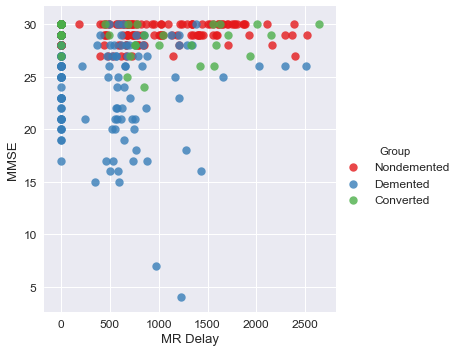

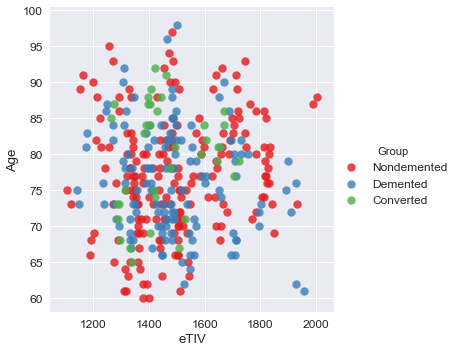

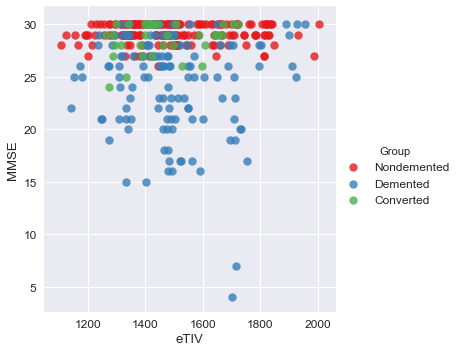

In [3]:
# Plot 2D relationship to highlight any correlating or separable features.
sns.lmplot('MR Delay', 'MMSE', data=oasis, hue='Group', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('eTIV', 'Age', data=oasis, hue='Group', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('eTIV', 'MMSE', data=oasis, hue='Group', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [4]:
# Preprocess and split data into train and test.
x_train, y_train, x_test, y_test = preprocess_split(oasis, train_split)
print('oasis train labels preprocssed.')

oasis train labels preprocssed.


In [5]:
# Fit a linear kernel SVM model
linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Evaluate using test set.
output_label = {0:'Converted', 1:'Demented', 2:'Nondemented'}
predicted_labels = linearsvm_model.predict(x_test)

acc = np.sum(predicted_labels == y_test) / y_test.size
positive_acc = np.sum((predicted_labels == 1) & (y_test == 1))/ np.sum(y_test == 1)

print('Linear kernel svm')
print ('accuracy %', acc*100)
print('Correct Demented accuracy %', positive_acc*100)

print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

Linear kernel svm
accuracy % 83.8095238095
Correct Demented accuracy % 85.7142857143
sklearn acc training acc:  0.935222672065
sklearn acc test acc:  0.838095238095


Confusion matrix
[[ 5  5  6]
 [ 4 30  1]
 [ 1  0 53]]


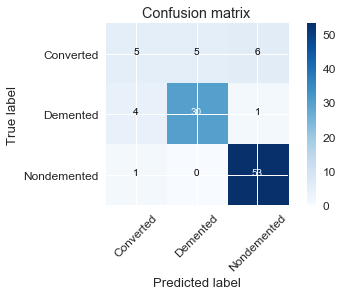

In [7]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Converted','Demented','Nondemented'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

Confusion matrix
[[ 0  0 16]
 [ 0  0 35]
 [ 0  0 54]]


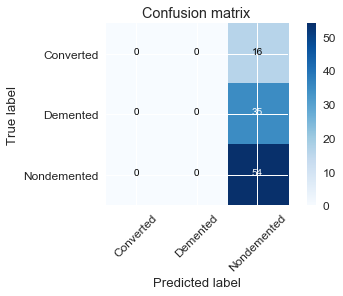

In [8]:
# Fit a RBF kernel SVM model.
linearsvm_model = svm.SVC(kernel='rbf', gamma=10**4, C=10**4)
linearsvm_model.fit(x_train, y_train)
predicted_labels = linearsvm_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [9]:
# Fit a RBF kernel SVM model.
# Too slow even with extra cache, skip.

# linearsvm_model = svm.SVC(kernel='poly', degree=2, cache_size=8000)
# linearsvm_model.fit(x_train, y_train)
# predicted_labels = linearsvm_model.predict(x_test)
# cnf_matrix=confusion_matrix(y_test, predicted_labels)
# plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [13]:
######################################################################
#################### Load raw TADPOLE Data. ##########################
######################################################################

tadpole = pd.read_csv('tadpole_filtered.csv')  
tadpole = tadpole.dropna()
tadpole.head()

,RID,DX_bl,AGE,PTGENDER,PTMARRY,FLDSTRENG,Ventricles,Hippocampus,WholeBrain,Entorhinal,...,ST23TS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24CV_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24SA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24TA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST24TS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25CV_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25SA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25TA_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST25TS_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16,ST26CV_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16
1,3,AD,81.3,Male,Married,1.5 Tesla MRI,84599,5319,1129830,1791,...,0.406,1267,603,1.692,1.025,545,157,2.526,0.657,7995
2,4,LMCI,67.5,Male,Married,1.5 Tesla MRI,39605,6869,1154980,3983,...,0.385,1981,395,3.434,0.956,521,139,2.826,0.346,10703
3,5,CN,73.7,Male,Married,1.5 Tesla MRI,34062,7075,1116630,4433,...,0.385,1839,431,2.846,0.871,755,216,2.78,0.509,12037
4,6,LMCI,80.4,Female,Married,1.5 Tesla MRI,39826,5348,927510,2277,...,0.467,1283,387,2.448,0.861,609,149,2.853,0.36,8929
5,7,AD,75.4,Male,Married,1.5 Tesla MRI,25704,6729,875798,2050,...,0.454,1288,496,2.015,0.66,795,199,3.013,0.442,5462


In [14]:
x_train, y_train, x_test, y_test = ps_tadpole(tadpole, train_split)
print('xt',x_train)
print('tadpole train labels preprocssed.')

xt [[  1.00000000e+00   8.13000000e+01   8.45990000e+04 ...,   2.52600000e+00
    6.57000000e-01   7.99500000e+03]
 [  1.00000000e+00   6.75000000e+01   3.96050000e+04 ...,   2.82600000e+00
    3.46000000e-01   1.07030000e+04]
 [  1.00000000e+00   7.37000000e+01   3.40620000e+04 ...,   2.78000000e+00
    5.09000000e-01   1.20370000e+04]
 ..., 
 [  0.00000000e+00   6.69000000e+01   6.54930000e+04 ...,   2.68600000e+00
    4.87000000e-01   9.06500000e+03]
 [  1.00000000e+00   7.24000000e+01   2.45450000e+04 ...,   2.60800000e+00
    5.93000000e-01   8.52600000e+03]
 [  0.00000000e+00   7.08000000e+01   5.11260000e+04 ...,   2.37300000e+00
    4.82000000e-01   7.74400000e+03]]
tadpole train labels preprocssed.


In [15]:
# Fit a linear kernel SVM model
linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# Evaluate using test set.
output_label = {0:'Converted', 1:'Demented', 2:'Nondemented'}
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

sklearn acc training acc:  0.527514231499
sklearn acc test acc:  0.625


Confusion matrix
[[  3  32   0   1]
 [ 17 134   0  10]
 [  1   0   0   0]
 [  1  22   0   3]]


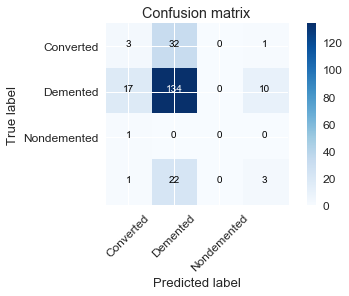

In [9]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Converted','Demented','Nondemented'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [3]:
######################################################################
#################### Load raw TADPOLE Data COMPLETE. ##########################
######################################################################
biomarkers = [
               'FDG', 'AV45',
               'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
               'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp'               
            ]
tadpole2 = pd.read_csv('TADPOLE_D1_D2.csv',
                       usecols=biomarkers + ['DX'],
                       low_memory=False)  
tadpole2 = tadpole2.dropna()

In [34]:
########### USING OTHER BIOMARKERS #############
x_train, y_train, x_test, y_test = ps_tadpole2(tadpole2, train_split)
# print('xt',x_train)
print('tadpole train labels preprocssed.')

tadpole train labels preprocssed.


In [35]:
# Fit a linear kernel SVM model
linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# Evaluate using test set.
output_label = {0:'Converted', 1:'Demented', 2:'Nondemented'}
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

sklearn acc training acc:  0.557755775578
sklearn acc test acc:  0.378378378378


Confusion matrix
[[ 0 55  0  1  0]
 [ 0 91  0  2  0]
 [ 0  3  0  0  0]
 [ 0 99  0  7  0]
 [ 0  1  0  0  0]]


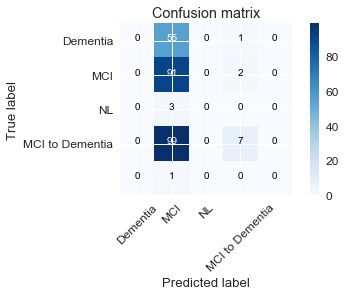

In [37]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','MCI','NL','MCI to Dementia'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [4]:

def load_data():
    df = pd.read_csv('Final_filtered_data.csv')
    df.sample(frac=1)
    raw_gen=pd.concat([df.iloc[:,1:5],df.iloc[:,6:14]],axis=1,join='inner')
    raw_MRI=df.iloc[:,14:136]
    raw_data=pd.concat([raw_gen,raw_MRI],axis=1,join='inner')
    return raw_data

def preprocess_data(raw_data):
    # Dropping missing values
    raw_data_cleaned=raw_data.dropna()
    raw_data_cleaned=raw_data_cleaned[(raw_data_cleaned.iloc[:,14:136]!=' ').all(1)]

    # Set some features as categorical
    xcat_p = raw_data_cleaned[['PTGENDER','PTMARRY']]
    raw_data_cleaned.drop(['DX_bl','PTGENDER','PTMARRY'], axis=1, inplace=True)
    #PTGENDER: 0:Female; 1: Male -- #PTMARRY: 0:Divorced; 1: Married; 2: Never Married 4:Widowed

    y_p = raw_data_cleaned[['DX']]
    raw_data_cleaned.drop(['DX'], axis=1, inplace=True)
    #DX: 0: Dementia, 1:MCI to Dementia; 2: MCI; 3: NL

    le = preprocessing.LabelEncoder()
    xcat=xcat_p.apply(le.fit_transform)
    x=pd.concat([xcat,raw_data_cleaned],axis=1,join='inner')

    # Set 'DX' (Demented or Not) as categorical
    y=y_p.apply(le.fit_transform)
    return x,y

def run_PCA_LDA(X,y,xtest,components):
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    y=np.ravel(y)
    target_names = ['Dementia','MCI','NL','MCI to Dementia']

    pca = PCA(n_components=components)
    pca1 =  pca.fit(X)
    X_r = pca1.transform(X)
    Xtest_r = pca1.transform(xtest)

    lda = LinearDiscriminantAnalysis(n_components=components)
    lda1= lda.fit(X, y)
    X_r2 = lda1.transform(X)
    Xtest_r2 = lda1.transform(xtest)

    # Percentage of variance explained for each component
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Tadpole dataset')

    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of Tadpole dataset')

    plt.show()

    x_pca=pd.DataFrame(X_r)
    x_lda=pd.DataFrame(X_r2)
    xtest_pca=pd.DataFrame(Xtest_r)
    xtest_lda=pd.DataFrame(Xtest_r2)
    y=pd.DataFrame(y)
    return x_pca,x_lda,xtest_pca,xtest_lda

def split_data(x,y):
    m=x.shape[0] # number of data points

    x_train=x.iloc[0:int(m*train_split),:].as_matrix()
    y_train=y.iloc[0:int(m*train_split),:].as_matrix().T[0]
    x_test=x.iloc[int(m*train_split)+1:m-1,:].as_matrix()
    y_test=y.iloc[int(m*train_split)+1:m-1,:].as_matrix().T[0]
    return x_train, y_train, x_test, y_test

In [1]:
####### FILTERED DATA #########
###### INCLUDE PCA LDA ######
#tadpole = pd.read_csv('tadpole_filtered.csv')  
#tadpole = tadpole.dropna()
tadpole = load_data()

x,y = preprocess_data(tadpole)

# print('xt',x_train)
print('tadpole train labels preprocssed.')
# print('xx', x)
# x_pca, x_lda=run_PCA_LDA(x,y,components=10)
#print (x_train)
# x_train, y_train, x_test, y_test=split_data(x_lda,y
x_train,y_train,x_test, y_test = split_data(x,y)

x_pca, x_lda, xtest_pca, xtest_lda=run_PCA_LDA(x_train, y_train, x_test,components=10)

# x_train, x_test = x_pca, xtest_pca ############# KEEP FOR PCA ################
x_train, x_test = x_lda, xtest_lda ############# KEEP FOR LDA ################
# print('xt', x_train)


NameError: name 'load_data' is not defined

In [12]:
# Fit a linear kernel SVM model
# y_train, y_test = y_train.T[0], y_test.T[0]
print('training svm model')
linearsvm_model = svm.SVC(kernel='linear', verbose=2, max_iter=10000000)
linearsvm_model.fit(x_train, y_train)

training svm model
[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=10000000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=2)

sklearn acc training acc:  0.862068965517
sklearn acc test acc:  0.451851851852
Confusion matrix
[[ 7 17  3]
 [20 36 23]
 [ 2  9 18]]


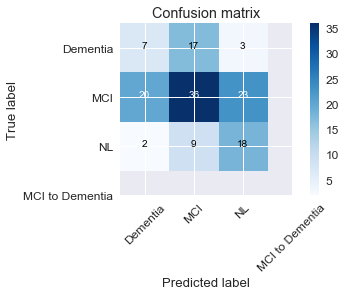

In [13]:
# Evaluate using test set.
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','MCI','NL','MCI to Dementia'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

xs (319, 3)
training regularized svm model
[LibLinear]done training.
sklearn acc training acc:  0.824451410658
sklearn acc test acc:  0.488888888889
Confusion matrix
[[ 6 16  5]
 [13 36 30]
 [ 0  5 24]]


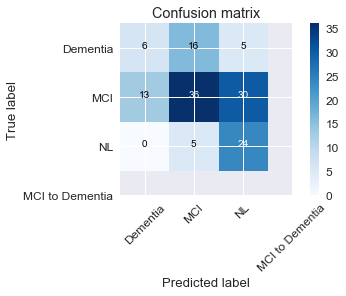

In [62]:
##### REGULARIZATION on linear SVM classifier #####
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
print('xs', x_train.shape)
print('training regularized svm model')
linearsvm_model = LinearSVC(
                    verbose=2, max_iter=10000000,
                    dual=False, C=.005, penalty='l1')
                    # class_weight='balanced')
linearsvm_model.fit(x_train, y_train)

print ('done training.')
# Evaluate using test set.
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','MCI','NL','MCI to Dementia'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

In [ ]:
##### NOTES FROM ABOVE REGULARIZATION ####
### (CREATE TABLE FOR THIS LATER)
#
# L2
# C=.001 test  acc best
#   sklearn acc training acc:  0.843260188088
#   sklearn acc test acc:  0.474074074074
# 
# L1
# C=.005 test acc best 
# sklearn acc training acc:  0.824451410658
# sklearn acc test acc:  0.488888888889
